In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
filenames = ['data/189_2014.txt']

raw_data = []
for f in filenames:
    raw_data = np.concatenate((raw_data, np.loadtxt(f, delimiter=',', skiprows=1, dtype=str)))
date_data = np.genfromtxt((i[:-2] if i[-1] == '3' else '' for i in raw_data), delimiter=';', 
                     dtype=[('date', 'U19'), ('height', 'float')])

In [46]:
file = open("data.txt", "w")
beginning = np.datetime64(pd.to_datetime(date_data[0][0], dayfirst=True), 's')
for d in date_data:
    file.writelines([str(np.datetime64(pd.to_datetime(d[0], dayfirst=True), 's'))+';', 
                     str((np.datetime64(pd.to_datetime(d[0], dayfirst=True), 's')
                          -beginning).item().total_seconds())+';', str(d[1])+'\n'])
file.close()

In [55]:
data = np.genfromtxt('data.txt', delimiter=";", usecols = range(1,3))
dates = np.genfromtxt('data.txt', dtype='datetime64[s]', delimiter=";", usecols = range(0,1))

In [110]:
d_dt_data = np.array([[data[i][0], (data[i+1][1]-data[i-1][1])/(data[i+1][0]-data[i-1][0])] for i in range(1, len(data)-1)])

<IPython.core.display.Javascript object>


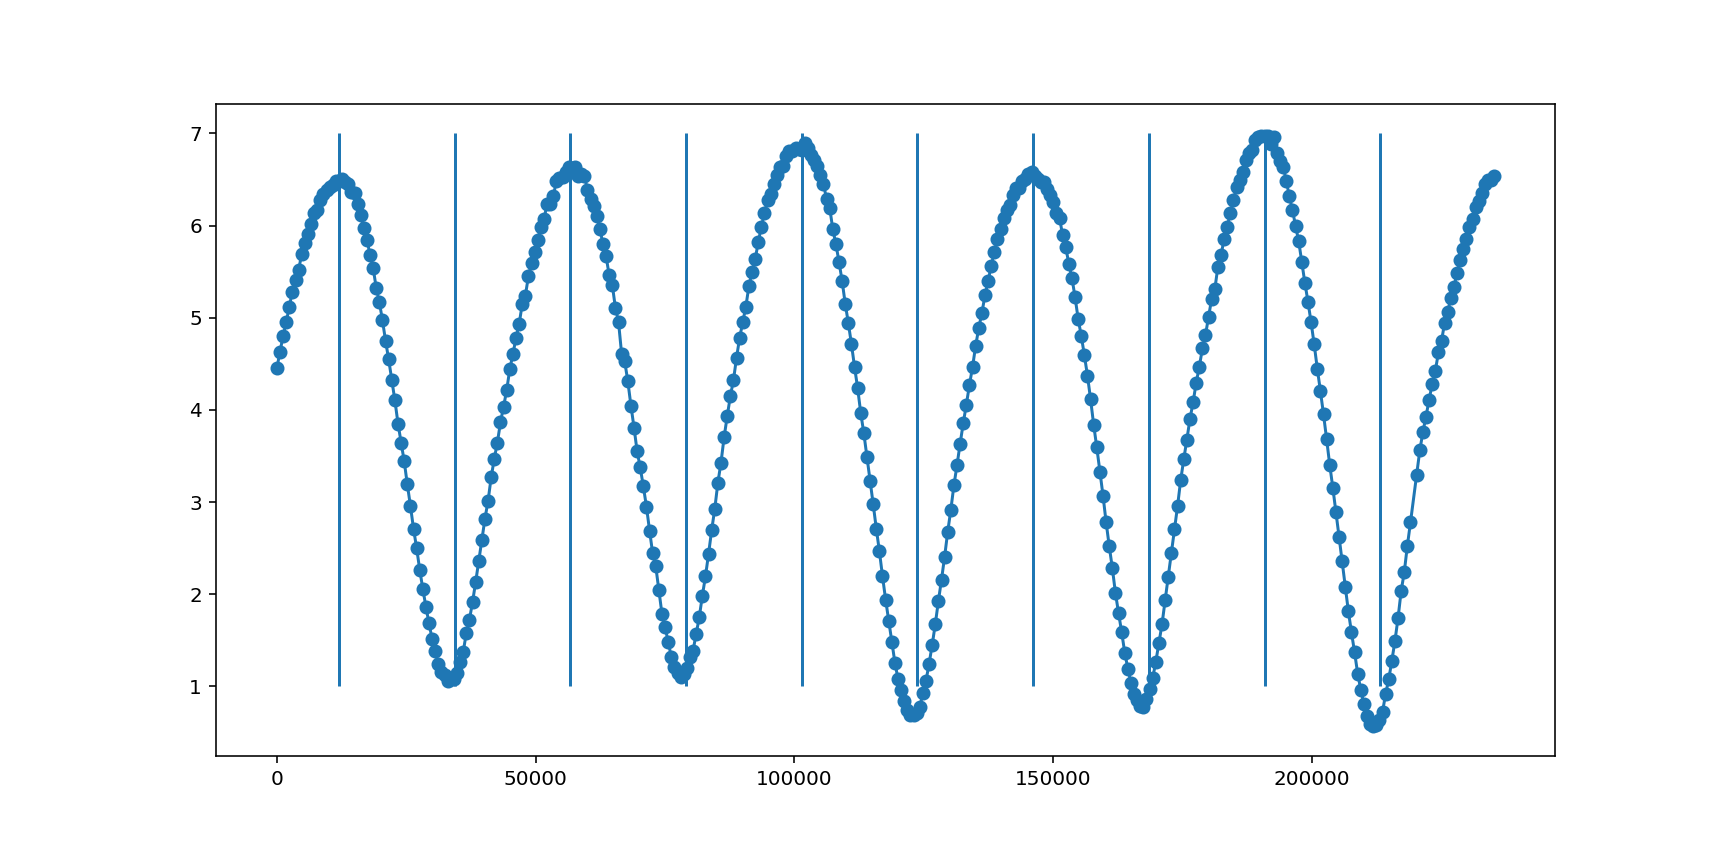

In [169]:
plt.rcParams["figure.figsize"] = (12,6)
period = (12*60 + 25)*60/2
offset = 12000
n = 10
l = int((n*period + offset)/600)

plt.plot(data[:l,0], data[:l,1], 'o-')
for i in range(n):
    plt.vlines(i*period+offset, 1, 7)

In [145]:
period

745.2